In [1]:
import pandas as pd
import numpy as np
from pybedtools import BedTool
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.pyplot import figure
import glob
import os

In [2]:
%%bash
#List packages in conda environment
conda list -n pybedtools

# packages in environment at /home/Pam/bin/anaconda3/envs/pybedtools:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       0_gnu    conda-forge
attrs                     19.3.0                     py_0    conda-forge
backcall                  0.1.0                      py_0    conda-forge
bedtools                  2.29.2               hc088bd4_0    bioconda
biopython                 1.76             py36h516909a_0    conda-forge
bleach                    3.1.0                      py_0    conda-forge
bzip2                     1.0.8                h516909a_2    conda-forge
ca-certificates           2019.11.28           hecc5488_0    conda-forge
certifi                   2019.11.28       py36h9f0ad1d_1    conda-forge
curl                      7.65.3               hf8cf82a_0    conda-forge
cycler                    0.10.0                     py_2    

In [5]:
def run_randomstats(files,genomefile,intervalfile):
    #Run bedtool randomstats to get stats of overlap between multiple bed files in files list against a specific interval file
    a = BedTool(intervalfile)
    #Use pythonbedtools to parallelize shuffling of intervals to get distribution if just by random (median of 10000 random shuffles)
    stats=[]
    for i in files:      
        b = BedTool(i)
        #Adding the chrom:True function will restrict shuffling of a specific feature within the same chromosome
        results = b.randomstats(a, iterations=10000, processes=96,shuffle_kwargs={"g":genomefile,"chrom":True},include_distribution=True)
        stats.append(results)
    return stats

def write_stats(es_dic,filename):
    #To write output of run_randomstats to csv file
    df = pd.DataFrame(es_dic)
    df2 = df[["file_a","file_b","iterations","actual","self","other","frac randomized above actual", "frac randomized below actual","median randomized", "normalized", "percentile", "lower_2.5th", "upper_97.5th"]]
    #P-value is given by the percent of the randomized population that is greater than the observed
    df2["Pvalue"]=(100-df2["percentile"])/100
    df2.to_csv(filename,index=None)

In [3]:
#Files is the list of files of features that we want to check overlaps with
files = glob.glob("/home/Pam/Plots/repeats_bedops/Nara/*.num")
files

['/home/Pam/Plots/repeats_bedops/Nara/Nara.I.Copia.sub.bed.sort.num',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.I.Gypsy.sub.bed.sort.num',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.II.CACTA.sub.bed.sort.num',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.II.hAT.sub.bed.sort.num',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.II.Helitron.sub.bed.sort.num',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.II.MuDR.sub.bed.sort.num',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.II.PiggyBac.sub.bed.sort.num',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.II.TcMar.sub.bed.sort.num',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.I.LINE.sub.bed.sort.num',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.100k.95pc.subtel.renamed.bed.num',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.100k.99pc.subtel.renamed.bed.num',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.100k.97.5pc.subtel.renamed.bed.num']

In [9]:
#Genomefile: bedtools genome file
genomefile = "/home/Pam/Plots/repeats_bedops/Nara.genome"
#Interval file: bed file of features of interest (in this case CGSC accessory regions in Nara gc5)
intervalfile = "../additional_data/Nara/Nara.accessory.regions.merge.bed"

In [10]:
Nara_stats = run_randomstats(files,genomefile,intervalfile)

/home/Pam/bin/anaconda3/envs/pybedtools/lib/python3.6/site-packages/pybedtools/bedtool.py:2794: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pct = (np.mean(a_len[idx]) / n) * 100.0
/home/Pam/bin/anaconda3/envs/pybedtools/lib/python3.6/site-packages/pybedtools/bedtool.py:2794: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pct = (np.mean(a_len[idx]) / n) * 100.0
/home/Pam/bin/anaconda3/envs/pybedtools/lib/python3.6/site-packages/pybedtools/bedtool.py:2794: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecate

In [11]:
#Example output
Nara_stats[0]

{'iterations': 10000,
 'actual': 14,
 'file_a': '/home/Pam/Plots/repeats_bedops/Nara/Nara.I.Copia.sub.bed.sort.num',
 'file_b': '../additional_data/Nara/Nara.accessory.regions.merge.bed',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.I.Copia.sub.bed.sort.num': 219,
 '../additional_data/Nara/Nara.accessory.regions.merge.bed': 27,
 'self': 219,
 'other': 27,
 'frac randomized above actual': 0.0108,
 'frac randomized below actual': 0.9766,
 'median randomized': 8.0,
 'normalized': 1.75,
 'percentile': 98.295,
 'lower_2.5th': 3.0,
 'upper_97.5th': 13.0,
 'distribution': array([4, 5, 9, ..., 9, 7, 9])}

(array([ 166.,  782., 1688., 2430., 2219., 1541.,  747.,  311.,   90.,
          26.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

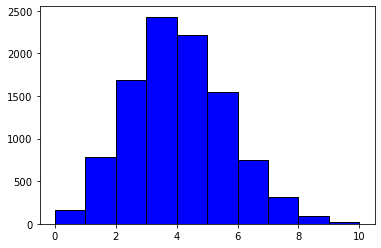

In [18]:
# Example distribution
plt.hist(Nara_stats[9]["distribution"], color = 'blue', edgecolor = 'black')

In [36]:
write_stats(Nara_stats,"/home/Pam/Plots/repeats_bedops/Nara.stats.csv")

/home/Pam/bin/anaconda3/envs/pybedtools/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [37]:
df = pd.read_csv("/home/Pam/Plots/repeats_bedops/Nara.stats.csv")
df["file_a"].to_list()

['/home/Pam/Plots/repeats_bedops/Nara/Nara.I.Copia.sub.bed.sort.num',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.I.Gypsy.sub.bed.sort.num',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.II.CACTA.sub.bed.sort.num',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.II.hAT.sub.bed.sort.num',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.II.Helitron.sub.bed.sort.num',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.II.MuDR.sub.bed.sort.num',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.II.PiggyBac.sub.bed.sort.num',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.II.TcMar.sub.bed.sort.num',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.I.LINE.sub.bed.sort.num',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.100k.95pc.subtel.renamed.bed.num',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.100k.99pc.subtel.renamed.bed.num',
 '/home/Pam/Plots/repeats_bedops/Nara/Nara.100k.97.5pc.subtel.renamed.bed.num']

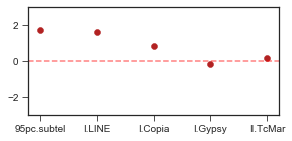

In [42]:
#Plotting randomstats output

#Calculate enrichment score by dividing bootstrapped distribution with the median of the randomized population (what you'd expect by random chance)
#This is given as "normalized" in randomstats
#log is used so 0 is completely random, <0: less than expected at random, >0: greater than expected at random 
df = pd.read_csv("/home/Pam/Plots/repeats_bedops/Nara.stats.csv")
df["es_median"] = np.log2(df["normalized"])

df=df.replace([np.inf, -np.inf], np.nan)

#Cleaning up of filenames
df["TE"]=df["file_a"].str.replace(".sub.bed.sort.num","")
df["TE"]=df["TE"].str.replace("/home/Pam/Plots/repeats_bedops/Nara/Nara.","")
df["TE"]=df["TE"].str.replace(".renamed.bed.num","")
df["TE"]=df["TE"].str.replace("100k.","")



#Plotting enrichment scores of the  major TE classes
TEorder = ["95pc.subtel","I.LINE","I.Copia","I.Gypsy","II.TcMar"]
df = df.set_index("TE").loc[TEorder]

figure(num=None, figsize=(4.5,2), facecolor='w', edgecolor='k')


plt.style.use('seaborn-ticks')


with PdfPages(r'/home/Pam/Plots/repeats_bedops/Nara.accessory.enrichment.pdf') as export_pdf:

    plt.scatter(df.index,df["es_median"],color="firebrick")
    
    plt.ylim(-3,3)
    plt.axhline(y=0,alpha=0.5,color="r",linestyle="--")
    
    export_pdf.savefig()
    plt.show()
    plt.close()